In [1]:
from google.colab import files
uploaded = files.upload()  # Clique no botão e selecione seu dataset_processado_atrasos.csv

Saving dataset_processado_atrasos.csv to dataset_processado_atrasos.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregando os dados
df = pd.read_csv('dataset_processado_atrasos.csv')

# Veja as primeiras linhas para conferir
df.head()

,order_id,order_status,delivery_time_days,delay_days,delay_category,review_score,review_comment_message,review_ruim
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,8.0,-8.0,Antecipado,4.0,"Não testei o produto ainda, mas ele veio corre...",0
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,13.0,-6.0,Antecipado,4.0,Muito bom o produto.,0
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,9.0,-18.0,Antecipado,5.0,NaN,0
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,13.0,-13.0,Antecipado,5.0,O produto foi exatamente o que eu esperava e e...,0
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2.0,-10.0,Antecipado,5.0,NaN,0


In [4]:
# Ajuste para as colunas do seu arquivo (exemplo abaixo)
X = df[['delay_days', 'delivery_time_days']]  # Adicione outras colunas se quiser
y = df['review_ruim']  # Alvo binário: 1 = review ruim, 0 = bom

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42)

In [6]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [7]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

In [8]:
# Random Forest
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
# Logistic Regression
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))

Random Forest
              precision    recall  f1-score   support

           0       0.82      0.98      0.90     22814
           1       0.76      0.22      0.34      6092

    accuracy                           0.82     28906
   macro avg       0.79      0.60      0.62     28906
weighted avg       0.81      0.82      0.78     28906

Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.99      0.89     22814
           1       0.81      0.17      0.27      6092

    accuracy                           0.82     28906
   macro avg       0.81      0.58      0.58     28906
weighted avg       0.81      0.82      0.76     28906



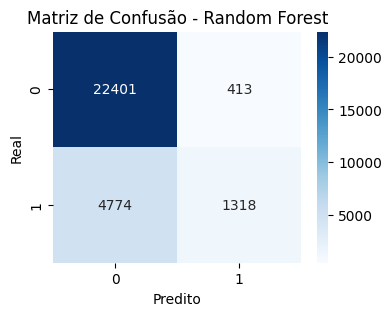

In [9]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Predito'); plt.ylabel('Real')
plt.savefig('matriz_confusao_rf.png')
plt.show()

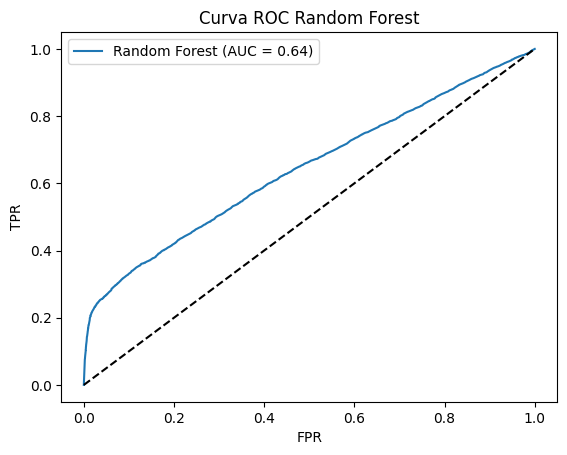

In [10]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('Curva ROC Random Forest')
plt.legend()
plt.savefig('roc_rf.png')
plt.show()

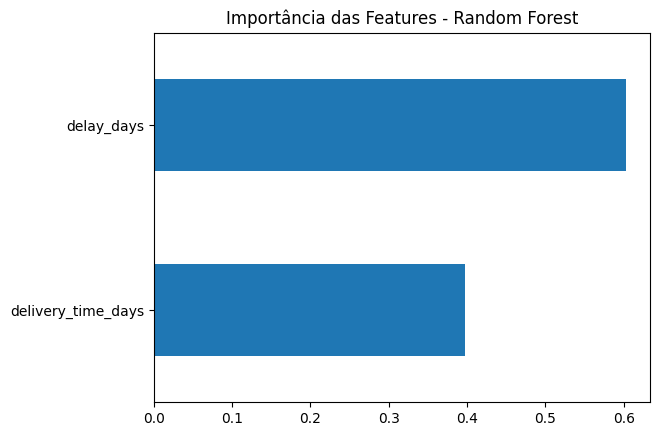

In [11]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Importância das Features - Random Forest')
plt.savefig('feature_importance_rf.png')
plt.show()

In [12]:
resultados = pd.DataFrame({
    'Modelo': ['Random Forest', 'Logistic Regression'],
    'Acurácia': [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_lr)],
    'Precisão': [precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_lr)],
    'Recall': [recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_lr)],
    'F1': [f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_lr)]
})
print(resultados)
resultados.to_csv('resultados_modelos.csv', index=False)

                Modelo  Acurácia  Precisão    Recall        F1
0        Random Forest  0.820556  0.761410  0.216349  0.336955
1  Logistic Regression  0.815921  0.810137  0.165299  0.274574


In [13]:
from google.colab import files
files.download('resultados_modelos.csv')
files.download('matriz_confusao_rf.png')
files.download('roc_rf.png')
files.download('feature_importance_rf.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>